# **POBLACIÓN MUNDIAL 1950 - 2023**

El siguiente dataset contiene datos oficiales de la Organización de las Naciones Unidas sobre la variación en la población mundial en el período 1950-2023. Los datos se separan por país, región y continente, además de mostrar el total del planeta. Tambien, el dataset se divide por sexo, informa sobre mortalidad infantil, expectativa de vida y datos finales de migración.


**PREGUNTAS O ANÁLISIS DE INTERÉS**

*   ¿Hay relación entre la edad de parto y las tasas de natalidad?
*   ¿Afectan los períodos de guerra a la cantidad de nacimientos, además de las muertes? Se analizarán los casos de Corea entre 1950 y 1953, de Vietnam entre 1955 y 1975 y de los países de la ex Yugoslavia entre 1991 y 2001.
*   Análisis de la situación argentina comparada con los datos latinoamericanos y del caribe desde 2000 hasta 2020, por década.









**IMPORTACIÓN DE LIBRERIAS**

In [3]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns



**IMPORTACIÓN DE BASE DE DATOS DESDE GOOGLE DRIVE**

In [4]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [5]:
database = pd.read_excel('/content/drive/MyDrive/Poblacion.xlsx')
database.shape

(21312, 31)

**DETECCIÓN DE VALORES AUSENTES**

<Axes: >

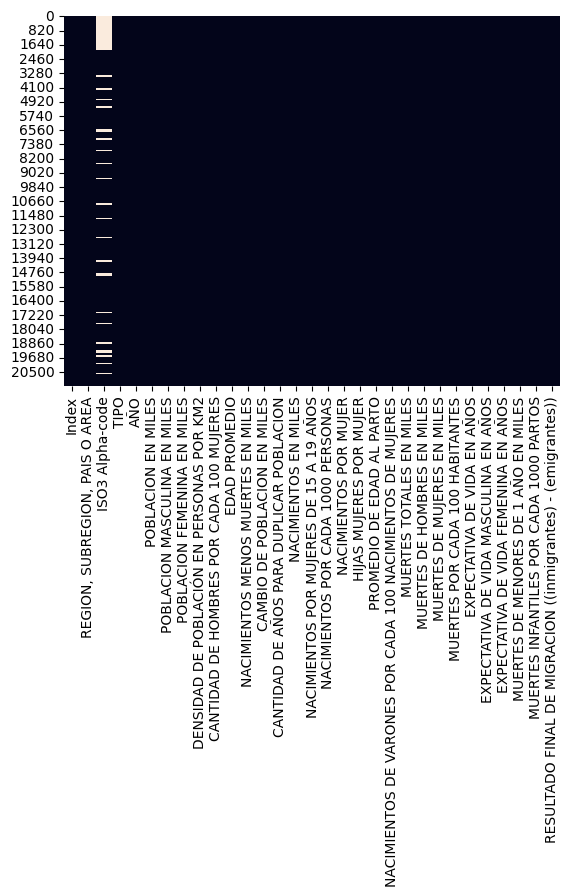

In [6]:
valores_nulos = database.isnull()

# se imprime la suma de valores nulos de cada columna
database.isnull().sum()

# se grafica con un mapa de calor de seaborn
sns.heatmap(database.isnull(), cbar=False)



Como se ve en el mapa de calor, la única columna con valores ausentes es la del código ISO de país, debido a que los registros mundiales o regionales carecen de dicha identificación. A continuación, se imprimen los primeros diez registros como demostración. Los valores perdidos se autocompletan con la leyenda NaN (not a number).




In [7]:
database.head(10)

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
0,1,World,NaN,World,1950,2493092.848,1241431.646,1251661.202,19.118,99.183,...,48486.892,25664.047,22822.845,19.448,46.394,44.465,48.436,12546.353,138.135,0.0
1,2,World,NaN,World,1951,2536927.035,1263362.496,1273564.539,19.454,99.199,...,48176.162,25384.180,22791.982,18.990,47.126,45.300,49.040,12566.473,136.046,0.0
2,3,World,NaN,World,1952,2584086.339,1287092.948,1296993.391,19.816,99.237,...,47383.364,24850.070,22533.294,18.337,48.218,46.525,49.972,12730.864,132.666,0.0
3,4,World,NaN,World,1953,2634106.235,1312354.748,1321751.488,20.200,99.289,...,47239.575,24721.773,22517.802,17.934,48.809,47.162,50.506,12672.102,130.128,0.0
4,5,World,NaN,World,1954,2685894.860,1338531.144,1347363.715,20.597,99.344,...,46662.428,24408.064,22254.364,17.373,49.651,48.013,51.332,12692.620,127.710,0.0
5,6,World,NaN,World,1955,2740213.792,1365978.617,1374235.175,21.013,99.399,...,46635.655,24436.990,22198.665,17.019,50.206,48.521,51.935,12651.210,124.820,0.0
6,7,World,NaN,World,1956,2795409.994,1393816.218,1401593.776,21.437,99.445,...,46479.062,24353.298,22125.764,16.627,50.737,49.041,52.477,12415.248,121.917,0.0
7,8,World,NaN,World,1957,2852618.337,1422613.719,1430004.617,21.875,99.483,...,46880.774,24584.927,22295.847,16.434,51.064,49.348,52.823,12580.776,120.017,0.0
8,9,World,NaN,World,1958,2911249.671,1452095.718,1459153.952,22.325,99.516,...,46518.263,24413.917,22104.346,15.979,51.615,49.862,53.412,12379.393,117.712,0.0
9,10,World,NaN,World,1959,2965950.351,1479588.664,1486361.688,22.744,99.544,...,50724.513,26607.162,24117.351,17.102,49.582,47.838,51.379,12969.870,125.721,0.0


**RELACIÓN ENTRE TASA DE NATALIDAD Y PROMEDIO DE EDAD AL PARTO**

El objetivo del siguiente análisis es determinar si hay una relación lineal entre la cantidad de nacimientos y el promedio de edad de las mujeres al parto.
Se utilizará un gráfico de dispersión para incluir las variables de tiempo, nacimientos y edad promedio.

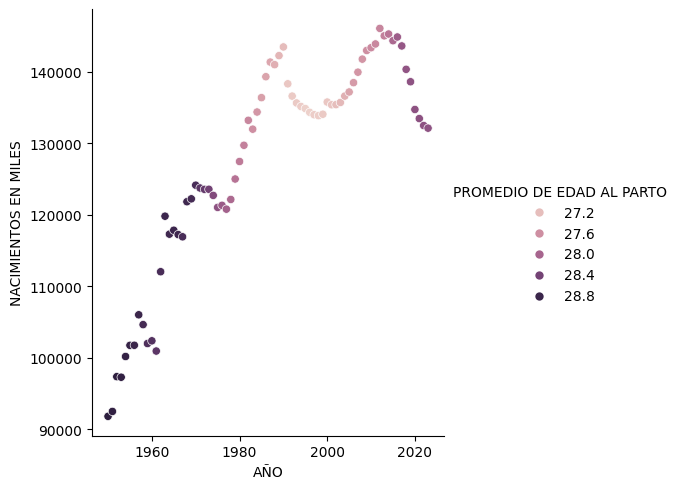

In [8]:
#Comando para grafico mediante Seaborn, con filtro en datos totales mundiales
sns.relplot( x='AÑO', y='NACIMIENTOS EN MILES', hue='PROMEDIO DE EDAD AL PARTO',
           data=database[database['REGION, SUBREGION, PAIS O AREA'] == 'World'])

En el gráfico se puede observar que la relación era prácticamente líneal entre la baja del promedio de edad y la suba de la cantidad de nacimientos hasta los años 90. A partir del año 2000, luego de una baja en nacimientos y una corta virtual meseta en el promedio de edad, La tendencia se invirtió durante prácticamente una década, con un promedio de edad cada vez más alto pero, a su vez, una suba también en los nacimientos. Luego del 2010, la tendencia de promedio de edad siguió a la suba, pero los nacimientos bajaron.

**ANÁLISIS DE LA SITUACIÓN ARGENTINA RESPECTO A LATINOAMÉRICA**

La idea de este análisis es porcentualizar la cantidad de población de Sudamérica y Argentina sobre toda la macrorregión de América Latina y el Caribe, y determinar si el país se alinea con el continente en totales regionales.

**2000**

In [9]:
# imprimimos los registros con la información necesaria
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
14850,15522,Latin America and the Caribbean,NaN,Region,2000,521323.344,258295.155,263028.189,25.724,98.201,...,3196.019,1788.692,1407.327,6.131,70.814,67.738,73.986,319.845,27.546,-989.551


In [11]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17736,18408,South America,NaN,Subregion,2000,348018.671,173078.663,174940.008,19.797,98.936,...,2153.44,1218.384,935.056,6.188,70.68,67.379,74.11,197.739,26.94,-287.423


In [91]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2000) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18476,18482,Argentina,ARG,Country/Area,2000,37213.984,18343.798,18870.186,13.33,97.21,...,281.694,150.118,131.576,7.57,73.91,70.498,77.288,13.382,18.596,-22.775


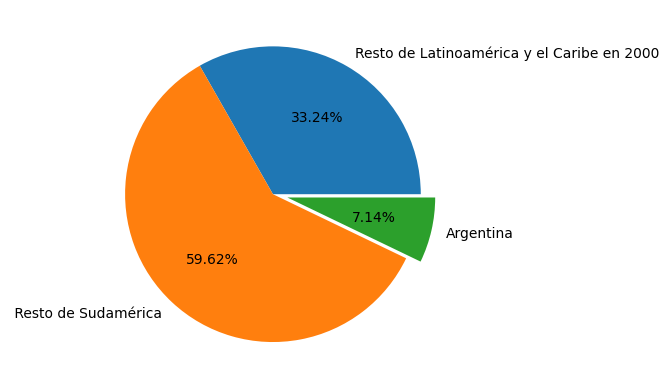

In [16]:
poblacion = [521323.344-348018.671, 348018.671-37213.984, 37213.984]
nombres = ['Resto de Latinoamérica y el Caribe en 2000',' Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()


**2010**

In [96]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
15526,15532,Latin America and the Caribbean,NaN,Region,2010,588907.843,291168.657,297739.187,29.059,97.793,...,3631.885,2013.436,1618.449,6.167,73.22,70.196,76.308,201.698,18.668,-888.119


In [18]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17746,18418,South America,NaN,Subregion,2010,390701.059,193804.304,196896.755,22.225,98.429,...,2342.697,1313.842,1028.855,5.996,74.041,70.755,77.411,111.377,16.629,-579.23


In [97]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2010) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18486,18492,Argentina,ARG,Country/Area,2010,41288.694,20404.978,20883.716,14.789,97.708,...,314.839,161.596,153.243,7.625,75.68,72.542,78.732,9.987,13.234,-5.003


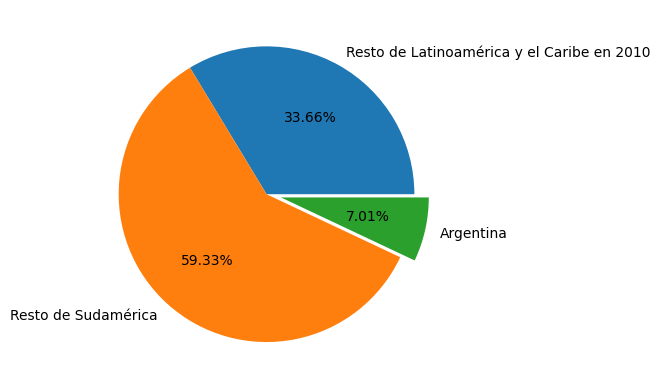

In [21]:
poblacion = [588907.843-390701.059, 390701.059-41288.694, 41288.694 ]
nombres = ['Resto de Latinoamérica y el Caribe en 2010', 'Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()

**2020**

In [99]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Latin America and the Caribbean') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Region')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
15536,15542,Latin America and the Caribbean,NaN,Region,2020,646729.384,318795.236,327934.148,31.912,97.213,...,4965.915,2775.3,2190.615,7.679,73.271,70.015,76.677,136.026,14.029,-608.019


In [22]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'South America') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Subregion')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
17756,18428,South America,NaN,Subregion,2020,426213.516,210858.568,215354.948,24.245,97.912,...,3217.041,1778.814,1438.227,7.548,74.284,71.096,77.618,77.406,13.055,-325.376


In [100]:
database[(database['REGION, SUBREGION, PAIS O AREA'] == 'Argentina') & (database['AÑO'] == 2020) & (database['TIPO'] == 'Country/Area')]

,Index,"REGION, SUBREGION, PAIS O AREA",ISO3 Alpha-code,TIPO,AÑO,POBLACION EN MILES,POBLACION MASCULINA EN MILES,POBLACION FEMENINA EN MILES,DENSIDAD DE POBLACIÓN EN PERSONAS POR KM2,CANTIDAD DE HOMBRES POR CADA 100 MUJERES,...,MUERTES TOTALES EN MILES,MUERTES DE HOMBRES EN MILES,MUERTES DE MUJERES EN MILES,MUERTES POR CADA 100 HABITANTES,EXPECTATIVA DE VIDA EN AÑOS,EXPECTATIVA DE VIDA MASCULINA EN AÑOS,EXPECTATIVA DE VIDA FEMENINA EN AÑOS,MUERTES DE MENORES DE 1 AÑO EN MILES,MUERTES INFANTILES POR CADA 1000 PARTOS,RESULTADO FINAL DE MIGRACION ((inmigrantes) - (emigrantes))
18496,18502,Argentina,ARG,Country/Area,2020,45191.965,22419.484,22772.48,16.187,98.45,...,381.886,198.55,183.335,8.45,75.878,72.981,78.783,5.326,9.771,0.292


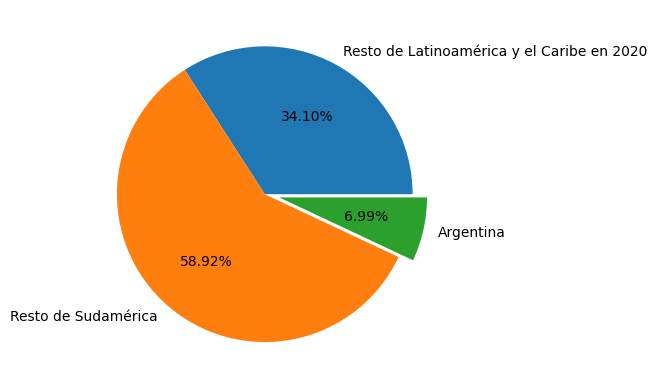

In [23]:
poblacion = [646729.384-426213.516, 426213.516-45191.965, 45191.965]
nombres = ['Resto de Latinoamérica y el Caribe en 2020', 'Resto de Sudamérica', 'Argentina']
desfase =(0, 0, 0.1)
plt.pie(poblacion, labels=nombres, explode=desfase, autopct='%.2f%%')
plt.show()

Los gráficos nos indican que Argentina acompaña la paulatina baja del porcentaje de población de Sudamérica en el total de Latinoamérica y el Caribe. Las tasas de natalidad del resto de la macrorregión están en aumento en el siglo XXI.

**SITUACIÓN DE PAÍSES EN GUERRA**